<a href="https://colab.research.google.com/github/gabrielkirsten/SISMOV-FIRMWARE/blob/master/movilepay_wallet_service_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MovilePay Wallet Service Recomendation

Esse serviço é responsável por inferir serviços recomendados a partir de dados
obtidos pela utilização da plataforma de Wallet. 

### Generate sample data


In [0]:
import numpy as np
from sklearn.datasets import make_blobs

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=0, centers=2, n_features=2)

Mouth revenue | Total Sales     | Classe
-----------   | --------------- | --------------
999.1023      | 1.01293         | Loan
0.123123      | 0.00023         | Bill Payment
0.123123      | 1.01293         | Bill Payment
100.1123      | 1.75675         | Same Wallet Service
0.123123      | 1.01293         | Bill Payment
0.123123      | 1.01293         | Same Wallet Service
0.123123      | 1.01293         | Bill Payment
0.112399      | 999.102         | Bill Payment
0.123123      | 1.01293         | Same Wallet Service
0.889055      | 1.01293         | Same Wallet Service
0.123123      | 1.01293         | Loan
0.123123      | 0.00013         | Same Wallet Service
0.000123      | 1.01293         | Bill Payment
0.123123      | 1.01293         | Bill Payment
0.123123      | 1.23422         | Same Wallet Service
999.1023      | 1.01293         | Bill Payment
0.123123      | 1.01293         | Bill Payment
0.123123      | 1.00000         | Same Wallet Service
0.000123      | 1.01293         | Loan
0.123123      | 1.01293         | Loan
999.1023      | 1.01293         | Bill Payment

### Create a KMeans with Minibatch Model
Vamos criar o nosso modelo que será responsável por resolver a nossa indicação

In [0]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(alpha=0.001, max_iter=100)

## Train your model

In [0]:
model = model.fit(X, y)

### Create a Mesh to plot

In [0]:
h = .02 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [5]:
print(model.score(X, y))

0.968


Plot results

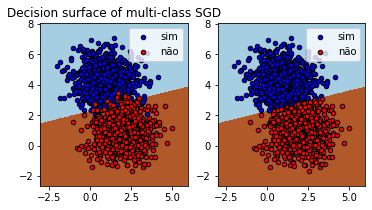

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 3))
colors = "br"
labels = ["sim", "não"]

plt.subplot(131)

cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('tight')

for i, color in zip([0, 1], colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], 
                X[idx, 1],
                c=color, 
                label=labels[i],
                cmap=plt.cm.Paired, 
                edgecolor='black', 
                s=20)
    
plt.title("Decision surface of multi-class SGD")
plt.axis('tight')
plt.legend()

plt.subplot(132)

cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('tight')

for i, color in zip([0, 1], colors):
    idx = np.where(model.predict(X) == i) # get all with 
    plt.scatter(X[idx, 0], 
                X[idx, 1],
                c=color, 
                label=labels[i],
                cmap=plt.cm.Paired, 
                edgecolor='black', 
                s=20)


plt.legend()
plt.show()

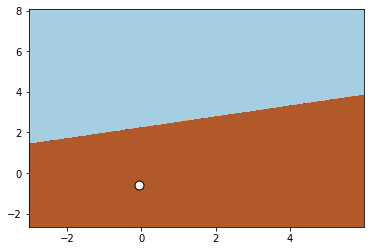

In [8]:
data = np.array([[-0.05250608,  -0.59237301]])

cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('tight')

prediction = model.predict(data)[0]

plt.scatter(data[0, 0], 
            data[0, 1],
            c='w', 
            label=labels[prediction],
            cmap=plt.cm.Paired, 
            edgecolor='black', 
            s=80)
